## Linear Regression

### Part 1 - Data Preprocessing

### Importing the dataset

In [352]:
import pandas as pd  #Importing the Pandas library and assigning it as alias pd to make it easier to reference Pandas functions
data = pd.read_csv('weatherHistory.csv')  #Reading the given dataset which is in CSV file and loading it into Pandas DataFrame as a variable called 'data'

In [353]:
data.info()  #Getting the summary of information of the dataset; to determine the no. of columns, no. of non-missing values, and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [354]:
data.head(5) #Displays the first n rows of the dataset; for us to inspect the dataset without loading all rows and to verify if it was loaded correctly
#12 columns: Formatted Date, Summary, Precip(itation) Type, Temperature, Apparent Temperature, Humidity, Wind Speed, Wind Bearing, Visibility, Loud Cover, Pressure, Daily Summary
#Independent Variables: Apparent Temperature, Humidity, Wind Speed, Wind Bearing, Visibility, Pressure
#Dependent Variable: Temperature

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [355]:
#Excluding the columns "Summary", "Precip Type", "Loud Cover", "Daily Summary" using drop() method
dataset = data.drop(columns=["Formatted Date", "Summary", 'Precip Type', 'Loud Cover', 'Daily Summary'])
dataset.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [356]:
#Moving the 'Temperature (C)' column to the last position
temperature_column = dataset.pop('Temperature (C)') #Removes the 'Temperature (C)' column then stores it in the variable 'temperature_column'
dataset['Temperature (C)'] = temperature_column #Adds 'Temperature (C)' column back containing the same data it has and positions it at the last column
dataset.head() #To see the changed positions of the columns

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Temperature (C)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13,9.472222
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63,9.355556
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41,8.288889
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51,8.755556


### Getting the inputs and output

In [357]:
#Selecting the inputs or the independent variable then storing them in 'X' variable
X = dataset.iloc[:,:-1].values  #Extracting the data from all rows of columns starting from the second column up to the second last column of the dataset then converting them into a NumPy array
X  #Displays the content of 'X' for us to see whether they are already in form of NumPy array

array([[7.38888889e+00, 8.90000000e-01, 1.41197000e+01, 2.51000000e+02,
        1.58263000e+01, 1.01513000e+03],
       [7.22777778e+00, 8.60000000e-01, 1.42646000e+01, 2.59000000e+02,
        1.58263000e+01, 1.01563000e+03],
       [9.37777778e+00, 8.90000000e-01, 3.92840000e+00, 2.04000000e+02,
        1.49569000e+01, 1.01594000e+03],
       ...,
       [2.20388889e+01, 5.60000000e-01, 8.98380000e+00, 3.00000000e+01,
        1.61000000e+01, 1.01566000e+03],
       [2.15222222e+01, 6.00000000e-01, 1.05294000e+01, 2.00000000e+01,
        1.61000000e+01, 1.01595000e+03],
       [2.04388889e+01, 6.10000000e-01, 5.87650000e+00, 3.90000000e+01,
        1.55204000e+01, 1.01616000e+03]])

In [358]:
#Selecting the output or the dependent variable then storing them in 'y' variable
y = dataset.iloc[:,6].values  #Extracting the data from all rows of the 7th column then converting them into a NumPy array
y  #Displays the content of 'y' for us to see whether they are already in form of NumPy array

array([ 9.47222222,  9.35555556,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

### Creating the Training Set and the Test Set

In [359]:
#Splitting our dataset to create a Training Set and Test Set
from sklearn.model_selection import train_test_split  #Importing the train_test_split function from the sklearn.model_selection module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  #Randomly splitting the dataset into training and test sets, with 90% of the data used for training (X_train, y_train) and 10% used for testing (X_test, y_test)

In [360]:
X_train

array([[-3.48888889e+00,  9.20000000e-01,  1.08514000e+01,
         1.71000000e+02,  4.87830000e+00,  1.01290000e+03],
       [-6.20000000e+00,  9.20000000e-01,  1.85150000e+00,
         3.00000000e+01,  2.59210000e+00,  1.03596000e+03],
       [ 7.27222222e+00,  7.30000000e-01,  2.55990000e+00,
         1.42000000e+02,  1.00464000e+01,  1.02216000e+03],
       ...,
       [ 1.35777778e+01,  8.40000000e-01,  1.09963000e+01,
         0.00000000e+00,  1.00303000e+01,  1.01472000e+03],
       [ 1.76388889e+01,  9.10000000e-01,  1.10285000e+01,
         1.19000000e+02,  7.03570000e+00,  9.97880000e+02],
       [ 1.38333333e+01,  6.40000000e-01,  2.23790000e+01,
         1.49000000e+02,  1.55526000e+01,  1.00277000e+03]])

In [361]:
X_test

array([[ 1.44222222e+01,  9.30000000e-01,  3.55810000e+00,
         2.73000000e+02,  1.58263000e+01,  1.01312000e+03],
       [ 1.21555556e+01,  7.20000000e-01,  1.60678000e+01,
         3.29000000e+02,  1.12700000e+01,  1.02110000e+03],
       [ 2.39611111e+01,  6.10000000e-01,  7.58310000e+00,
         9.00000000e+00,  9.98200000e+00,  1.01837000e+03],
       ...,
       [-1.00000000e+00,  9.20000000e-01,  4.70120000e+00,
         3.49000000e+02,  5.97310000e+00,  1.03334000e+03],
       [ 7.32777778e+00,  9.30000000e-01,  4.55630000e+00,
         6.00000000e+01,  3.23610000e+00,  1.01497000e+03],
       [ 1.60611111e+01,  7.20000000e-01,  8.54910000e+00,
         2.98000000e+02,  1.12700000e+01,  1.01541000e+03]])

In [362]:
y_train

array([ 0.02222222, -6.2       ,  7.27222222, ..., 13.57777778,
       17.63888889, 13.83333333])

In [363]:
y_test

array([14.42222222, 12.15555556, 23.96111111, ..., -1.        ,
        7.32777778, 16.06111111])

## Part 2 - Building and training the model

### Building the model

In [364]:
#Setting up a linear regression model using scikit-learn
from sklearn.linear_model import LinearRegression  #Importing the Linear Regression class from the linear module
model = LinearRegression()  #Creating an instance of LinearRegression class named 'model'

### Training the Model

In [365]:
#Training the linear regression model using the train set data that we created
model.fit(X_train, y_train)

LinearRegression()

### Reducing Overfitting

In [ ]:
#Using Lasso Regressor or regularization method to reduce the risk of overfitting
from sklearn.linear_model import Lasso #Importing the Lasso funtion from sklearn.linear module

model = Lasso(alpha=0.1)  #Setting the alpha to 0.1 to have moderate level of regularization
model.fit(X_train, y_train)

Lasso(alpha=0.1)

### Inference

In [373]:
#Making predictions based on the test set data (X_test)
y_pred = model.predict(X_test)
y_pred

array([14.48159952, 13.48597032, 23.35348789, ...,  0.74609893,
        8.23228582, 16.30627262])

In [374]:
#Displaying the y_test for comparison with the predicted output
y_test

array([14.42222222, 12.15555556, 23.96111111, ..., -1.        ,
        7.32777778, 16.06111111])

#### Making the prediction of a single data point using the first row of the dataset

In [375]:
#Predicting what will be the temperature based on the independent variables of the 1st row of the dataset
Temp = model.predict([[7.388889, 0.89, 14.1197, 251.0, 15.8263, 1015.13]])
Temp

array([9.18126102])

## Part 3: Evaluating the Model

### R-Squared

In [376]:
#Evaluating the performarce of our regression model using the metric R-squared
from sklearn.metrics import r2_score  #Importing the r2_score (R-squared score) function from scikit-learn's metrics module
r2 = r2_score(y_test, y_pred) #Calculating the R-squared score which indicates how well our model's predictions fit the actual data
r2 #The computed r2_score is approximately equal to 0.9, hence it means that our model performs very well/good

0.989586560632771

### Adjusted R-Squared

In [377]:
#Retrieving the number of independent variable in our dataset
#k = number of independent variables
k = X_test.shape[1] #X_test.shape[1] to get the number of columns
k

6

In [378]:
#Retrieving the sample size of our data set
#n = sample size
n = X_test.shape[0] #X_test.shape[0] to get the number of rows
n

19291

In [379]:
#Determining the Adjusted R-Squared to get a more reliable score especially that our dataset has multiple independent variables or features
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2 ##The computed Adjusted r2_score is approximately equal to 0.9, hence it means that our model performs very well/good

0.9895833206080767

### Mean Squared Error

In [380]:
#Calculating the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error  #Importing the mean_squared_error function from sklearn.metrics
mse = mean_squared_error(y_test, y_pred)  #Calculating the MSE for us to see how far off the predictions from the actual data 
mse

np.float64(0.9439723772735564)

In [381]:
#Converting the MSE into percentage for us to understand it easier
mse_percentage = (mse / y_test.mean()) * 100
print(f"Mean Squared Error as a percentage: {mse_percentage:.2f}%")

Mean Squared Error as a percentage: 7.95%


### Root Mean Squared Error

In [ ]:
#Calculating the Root Mean Squared Error (RMSE) for us to interpret the error in the same units as the target variable
import numpy as np
rmse = np.sqrt(mse) #Calculating the RSME by taking the square root of the MSE using the np.sqrt function
rmse

np.float64(0.9715824088946632)

## Visualization

### Correlation of the variables to each other

#### Correlation Heatmap of Dataset Features

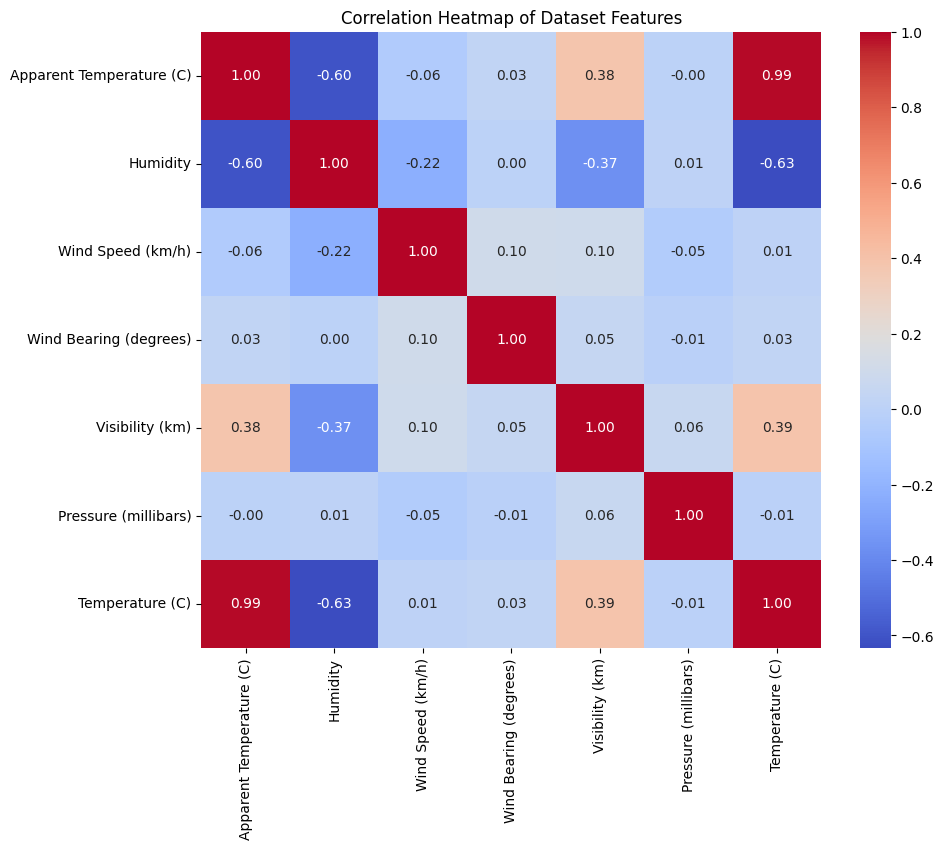

In [383]:
#Creating a correlation heatmap using matplotlib and seaborn
# 1=Perfect Positive Correlation, -1=Perfect Negative Correlation, 0=No Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Dataset Features")
plt.show()

### Pairwise Relationship of Dataset Features with Correlation to the Dependent Variable

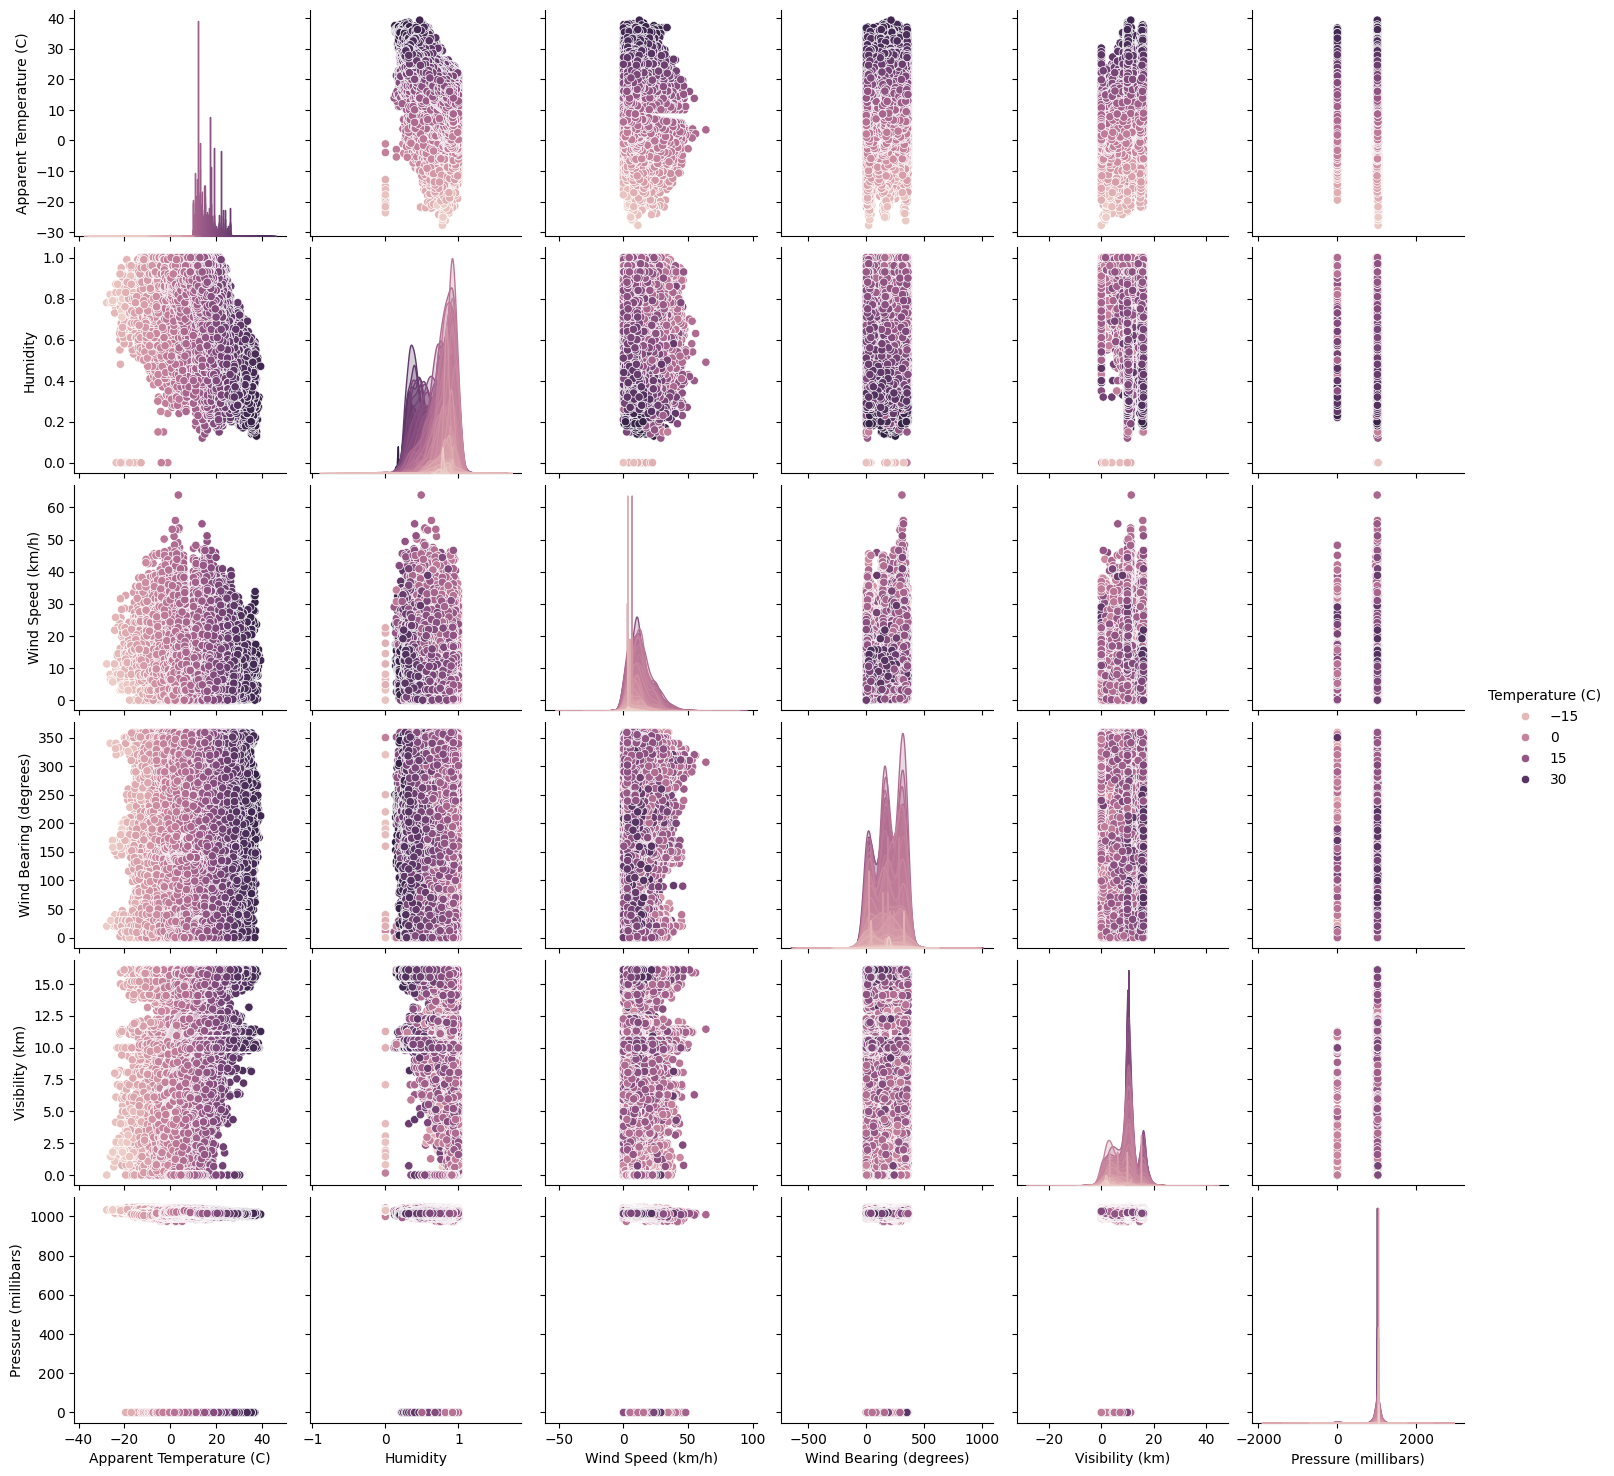

In [386]:
#Visualizing the relation of each independent variable to the dependent variable using pairplot function
sns.pairplot(dataset, hue="Temperature (C)")
plt.show()

### Relationship of Actual Data and Predicted Data

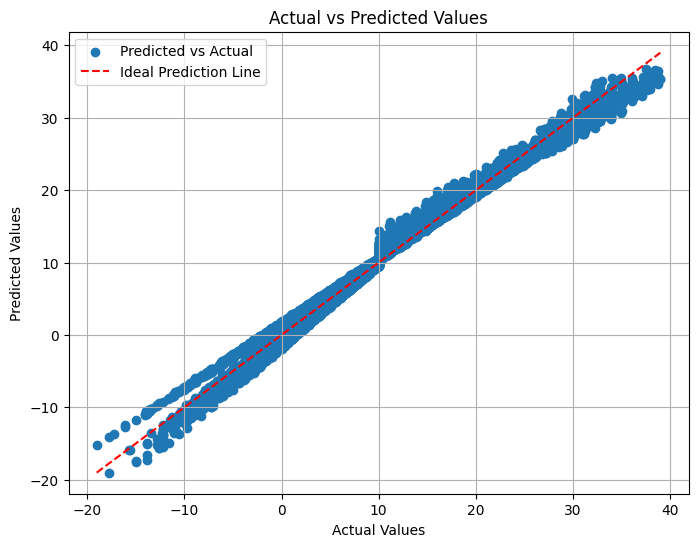

In [384]:
#Visualizing the relationship between the actual data and the predicted data using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Relationship of Each Independent Variable to the Dependent Variable

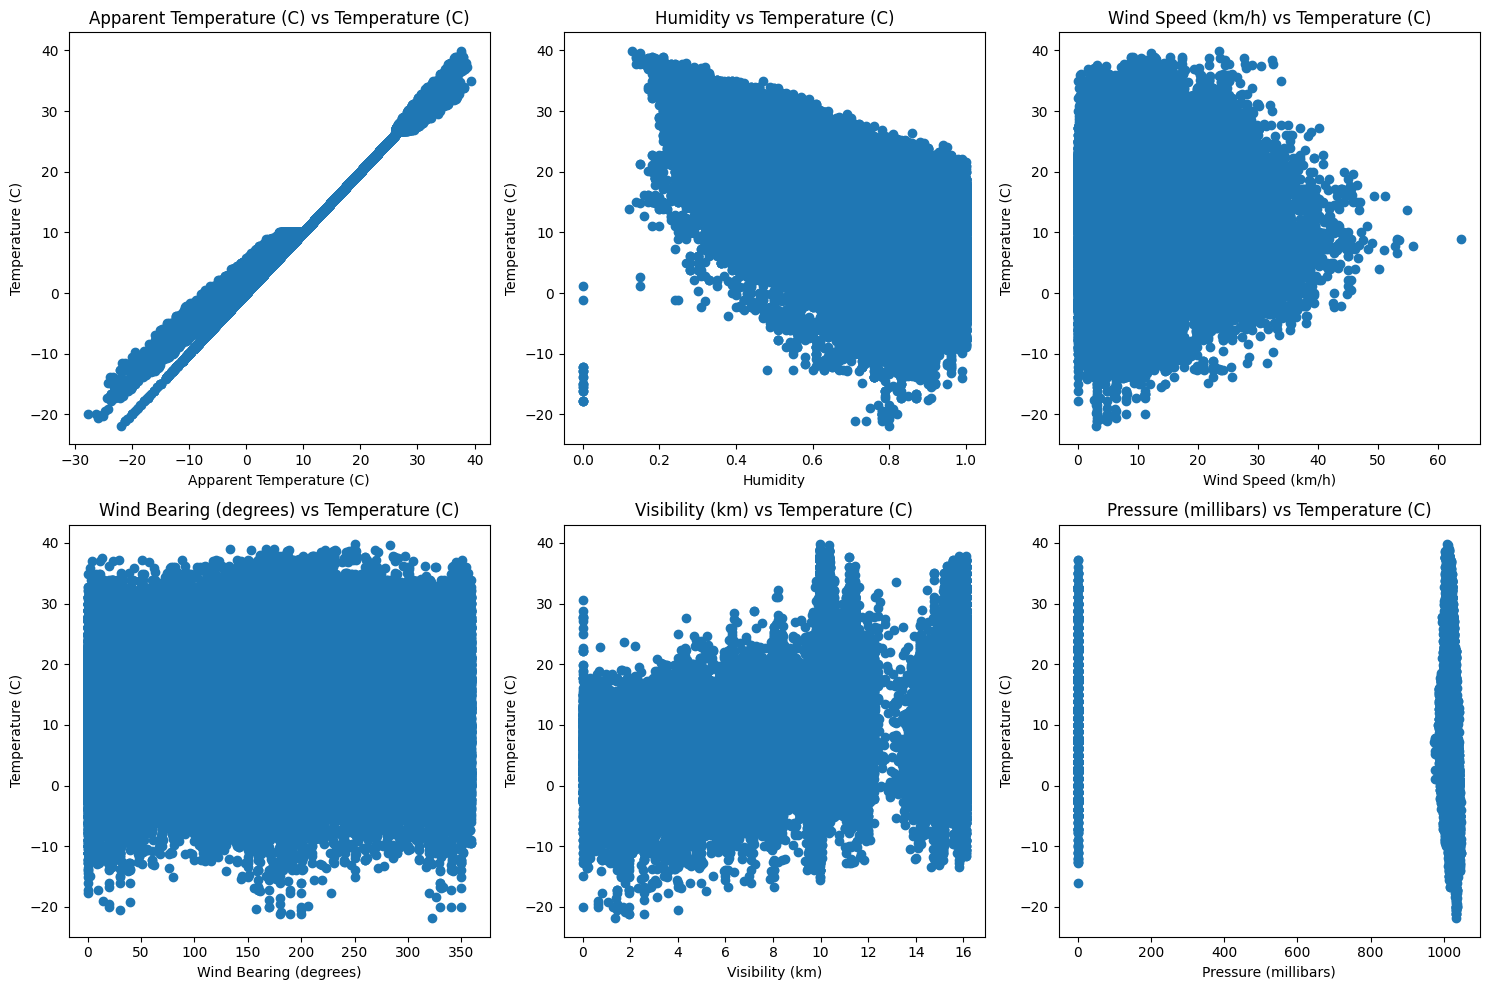

In [385]:
#Visualizing the relationship of each independent variable with the dependent variable using scatter plot

#Creating a figure
plt.figure(figsize=(15, 10))

#First subplot (1st row, 1st column)
plt.subplot(2, 3, 1)  #rows, columns, subplot
plt.scatter(dataset['Apparent Temperature (C)'], dataset['Temperature (C)'])
plt.title('Apparent Temperature (C) vs Temperature (C)')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Temperature (C)')

#Second subplot (1st row, 2nd column)
plt.subplot(2, 3, 2) 
plt.scatter(dataset['Humidity'], dataset['Temperature (C)'])
plt.title('Humidity vs Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

#Third subplot (1st row, 3rd column)
plt.subplot(2, 3, 3) 
plt.scatter(dataset['Wind Speed (km/h)'], dataset['Temperature (C)'])
plt.title('Wind Speed (km/h) vs Temperature (C)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (C)')

#Fourth subplot (2nd row, 1st column)
plt.subplot(2, 3, 4) 
plt.scatter(dataset['Wind Bearing (degrees)'], dataset['Temperature (C)'])
plt.title('Wind Bearing (degrees) vs Temperature (C)')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Temperature (C)')

#Fifth subplot (2nd row, 2nd column)
plt.subplot(2, 3, 5) 
plt.scatter(dataset['Visibility (km)'], dataset['Temperature (C)'])
plt.title('Visibility (km) vs Temperature (C)')
plt.xlabel('Visibility (km)')
plt.ylabel('Temperature (C)')

#Sixth subplot (2nd row, 3rd column)
plt.subplot(2, 3, 6) 
plt.scatter(dataset['Pressure (millibars)'], dataset['Temperature (C)'])
plt.title('Pressure (millibars) vs Temperature (C)')
plt.xlabel('Pressure (millibars)')
plt.ylabel('Temperature (C)')

#Adjusting the layout
plt.tight_layout()
plt.show()